# Reading the Data and Preprocessing

In [ ]:
#import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
import seaborn as sns
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from tqdm import tqdm

# Read the dataset

In [2]:
df= pd.read_csv('predictive_maintenance.csv')
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

# Data Analysis

In [3]:
df.shape

(10000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
print(df.describe().T)

                           count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Target                   10000.0     0.03390     0.180981     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Target     

In [6]:
print(df.describe(include= 'object'))

       Product ID   Type Failure Type
count       10000  10000        10000
unique      10000      3            6
top        M14860      L   No Failure
freq            1   6000         9652


In [7]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Droping unnecessary columns 

In [9]:
df.drop(columns=['UDI','Product ID'],inplace=True)
print(df.head())

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure  


In [10]:
cat_cols= df.select_dtypes(include= 'O').columns.tolist()
cat_cols

['Type', 'Failure Type']

In [11]:
for col in cat_cols:
    print(df[col].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


## Encoding

In [12]:
df['Type'].replace({'M':0,"L":1,"H":2},inplace=True)

In [13]:
y=df[['Target']]
x=df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
y['Target'].unique()

array([0, 1], dtype=int64)

In [14]:
print(df['Type'].unique())

[0 1 2]


In [15]:
print(np.shape(y))

(10000, 1)


In [16]:
len(x.columns)

5

# Data Visualization

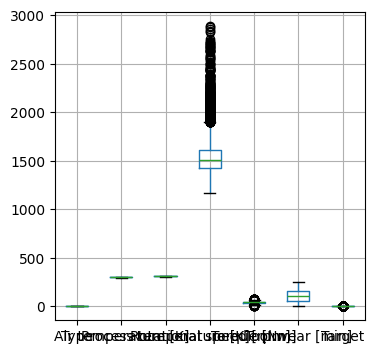

In [17]:
plt.figure(figsize=(4,4))
df.boxplot(figsize= (15,10))
plt.show()

C:\Users\mhmou\AppData\Local\Temp\ipykernel_23036\3642882504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rotational speed [rpm]'])


<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

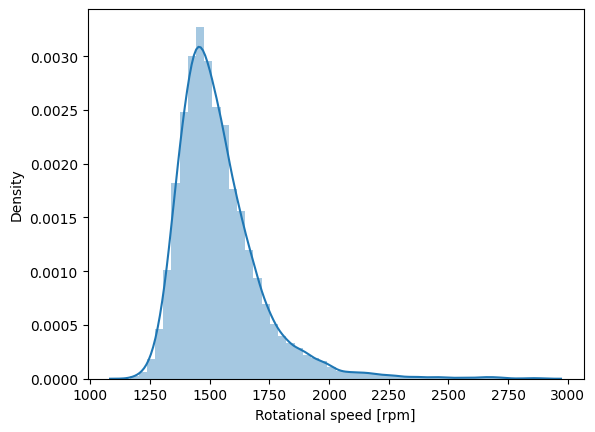

In [18]:
sns.distplot(df['Rotational speed [rpm]'])

In [19]:
from scipy.stats import skew

skewness = skew(df['Rotational speed [rpm]'])
print('Skewness: ', skewness)

Skewness:  1.9928720166048546


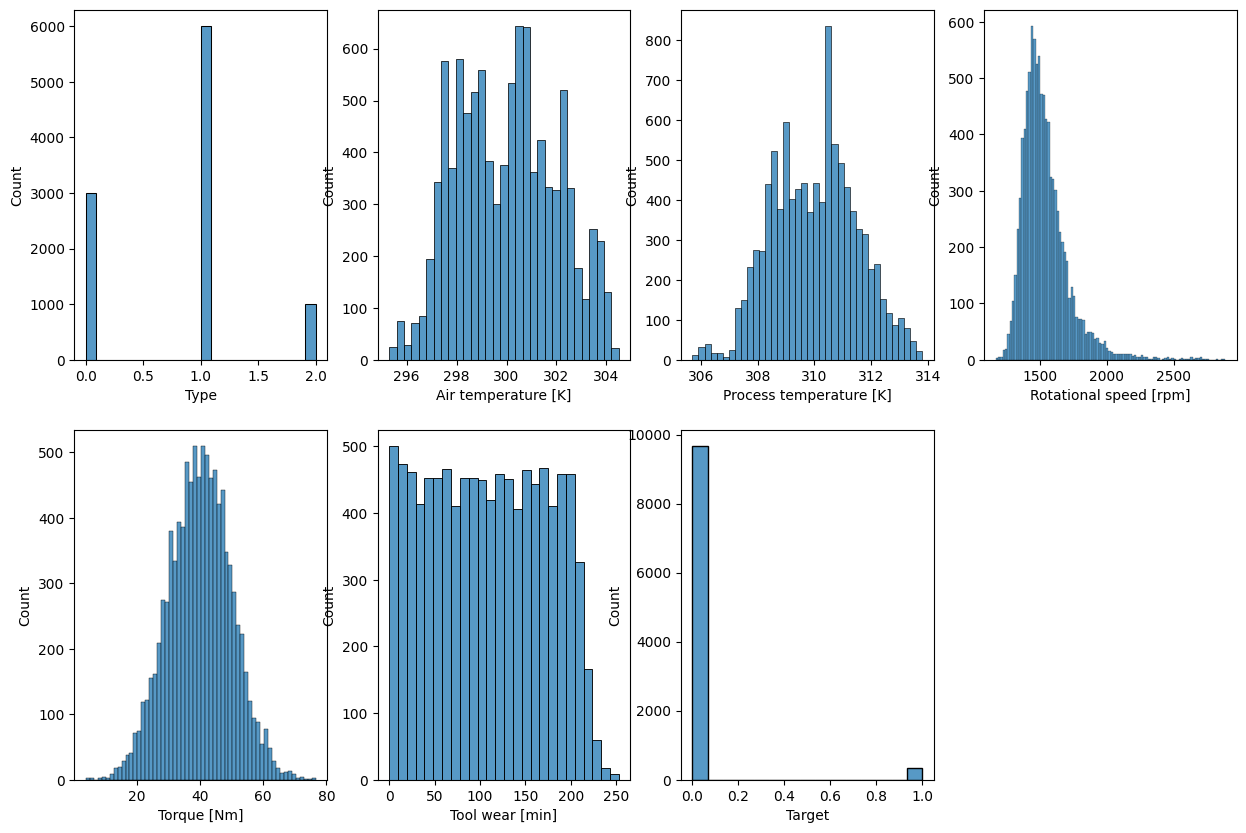

In [20]:
num_cols= df.select_dtypes(exclude='O').columns.tolist()

plt.figure(figsize= (15,10))

for i, col in  enumerate(num_cols, 1):
    plt.subplot(2,4,i)
    sns.histplot(data= df, x= col)
plt.show()

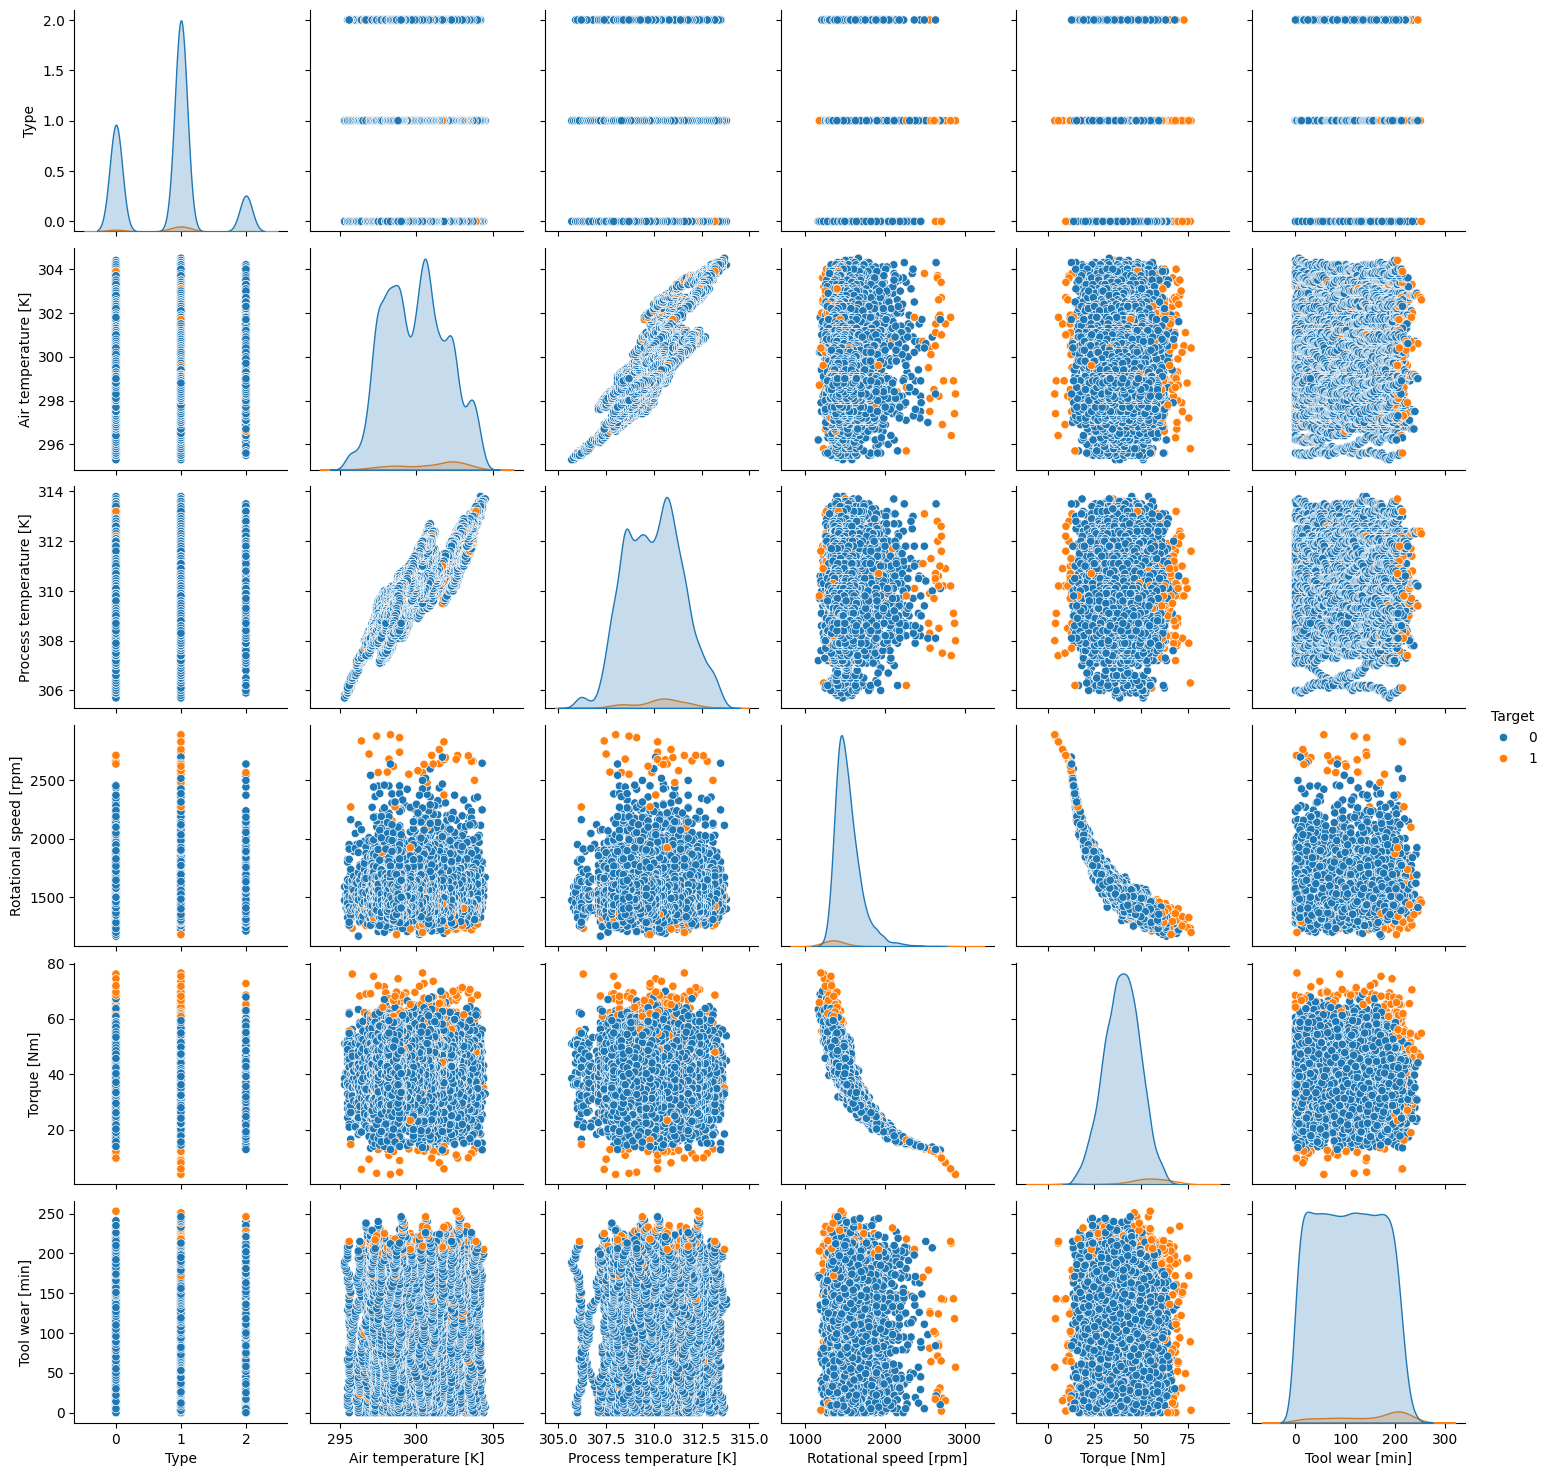

In [21]:
sns.pairplot(df, hue= 'Target')
plt.show()

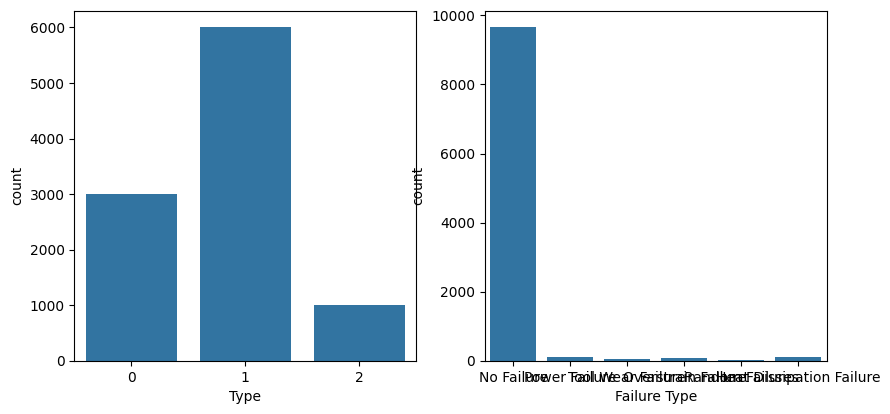

In [22]:
plt.figure(figsize= (15,10))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(data= df, x= col)
plt.show()

<Axes: >

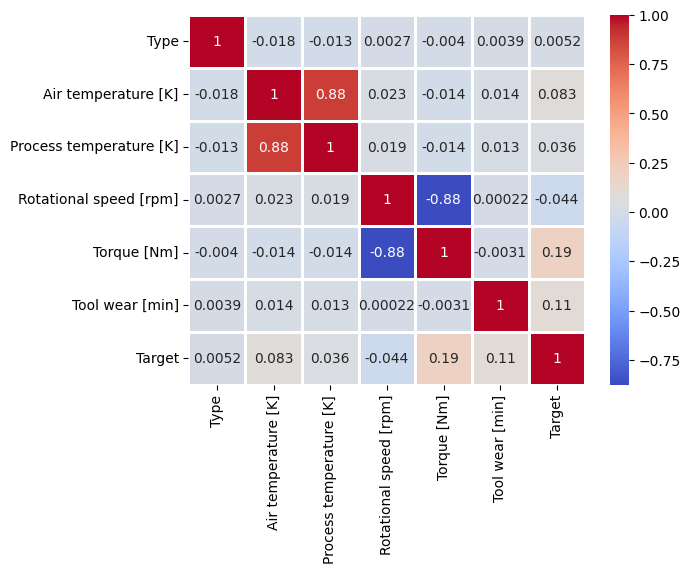

In [23]:
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= 'coolwarm', linewidths=2)

# Mode-Specific Normalization

In [24]:
minority_diff=df[df['Target']==0].count()[1]-df[df['Target']==1].count()[1]

In [25]:
new_df=df[df['Target']==1]
new_df.count()

Type                       339
Air temperature [K]        339
Process temperature [K]    339
Rotational speed [rpm]     339
Torque [Nm]                339
Tool wear [min]            339
Target                     339
Failure Type               339
dtype: int64

In [26]:
x=new_df.drop(columns=['Target','Type','Failure Type'])
y=new_df['Target']

In [27]:
x.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
50                 298.9                    309.1                    2861   
69                 298.9                    309.0                    1410   
77                 298.8                    308.9                    1455   
160                298.4                    308.2                    1282   
161                298.3                    308.1                    1412   

     Torque [Nm]  Tool wear [min]  
50           4.6              143  
69          65.7              191  
77          41.3              208  
160         60.7              216  
161         52.3              218

In [ ]:
n_samples    = len(y)
n_features   = x.shape[1]
n_class    = y.nunique()
# ——— CONFIGURATION ———
batch_size   = 10
epoch_count  = 10
noise_dim    = 100
gmm_components = 2
epsilon      = 1e-6

5

In [29]:
print(y.head())

50     1
69     1
77     1
160    1
161    1
Name: Target, dtype: int64


In [ ]:
# Function to fit GMM for a single continuous feature
def fit_gmm_for_continuous_feature(feature, n_components=2):
    arr = feature.values.reshape(-1, 1)
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(arr)
    return gmm

# Function to normalize a continuous feature using GMM
def normalize_feature_with_gmm(feature, gmm):
    arr = feature.values.reshape(-1, 1)
    cluster_ids = gmm.predict(arr.reshape(-1, 1))
    means = gmm.means_[cluster_ids, 0].flatten()
    stds  = np.sqrt(gmm.covariances_[cluster_ids, 0].flatten() + epsilon)
    normalized = ((feature.values - means) / stds).astype(np.float32)
    return normalized, cluster_ids

# Function to inverse normalize the feature (after generation)
def inverse_normalize_with_gmm(normalized_feature, gmm, cluster_ids):

    means = gmm.means_[cluster_ids].flatten()
    stds = np.sqrt(gmm.covariances_[cluster_ids].flatten() + 1e-6)
    original_guesses = normalized_feature * stds + means
    # Choose the cluster whose decoded value is closest to its own mean
    best = np.argmin(np.abs(original_guesses - means))
    return normalized_feature * stds[best] + means[best]


#### Normalizing the Data in X

In [32]:
#normalizing the data
gmm_models   = {}
cluster_maps = {}
X_norm       = np.zeros((n_samples, n_features), dtype=np.float32)

for idx, col in enumerate(x.columns):
    gmm = fit_gmm_for_continuous_feature(x[col])
    gmm_models[col] = gmm
    norm_vals, clusters = normalize_feature_with_gmm(x[col], gmm)
    X_norm[:, idx]  = norm_vals
    cluster_maps[col] = clusters
    
normalized_feature=X_norm.T
gmm

GaussianMixture(n_components=2, random_state=42)

In [33]:
len(cluster_maps['Air temperature [K]'])

339

In [34]:
# Grouping the data together to make it ready to be batched
y_tensor     = y.values.astype(np.int32)
dataset      = (
    tf.data.Dataset
      .from_tensor_slices((X_norm, y_tensor))
      .shuffle(buffer_size=1000)
      .batch(batch_size, drop_remainder=True)
)


print(len(dataset))

33


In [35]:
print(len(y))

339


# CTGAN Model

#### Loss and Optiimizer

In [36]:
# Define Loss function for Classification between Real and Fake
bce_loss = tf.keras.losses.BinaryCrossentropy()

# Discriminator Loss
def discriminator_loss(real, fake):
	real_loss = bce_loss(tf.ones_like(real), real)
	fake_loss = bce_loss(tf.zeros_like(fake), fake)
	total_loss = real_loss + fake_loss
	return total_loss

# Generator Loss
def generator_loss(preds):
	return bce_loss(tf.ones_like(preds), preds)

# Optimiser for both Generator and Dsicriminator
d_optimizer=Adam(learning_rate=0.0002, beta_1 = 0.5)
g_optimizer=Adam(learning_rate=0.0002, beta_1 = 0.5)


Building the Generator Model


In [37]:
def build_generator():

	# label input
	in_label = tf.keras.layers.Input(shape=(1,), dtype='int32')
	li = tf.keras.layers.Embedding(n_class, 100)(in_label)
	li = tf.keras.layers.Flatten()(li)

	# data generator input
	in_lat = tf.keras.layers.Input(shape=(noise_dim,))
	gen = tf.keras.layers.Dense(512)(in_lat)
	gen = tf.keras.layers.LeakyReLU(alpha=0.1)(gen)

	# merge data gen and label input
	merge = tf.keras.layers.Concatenate()([gen, li])

	gen = tf.keras.layers.Dense(1024)(merge) 
	gen = tf.keras.layers.LeakyReLU(alpha=0.2)(gen)

	gen = tf.keras.layers.Dense(512)(gen) 
	gen = tf.keras.layers.LeakyReLU(alpha=0.2)(gen)

	gen = tf.keras.layers.Dense(128)(gen) 
	gen = tf.keras.layers.LeakyReLU(alpha=0.2)(gen)

	# Activation function 'linear' for continous data type for the tabular data
	out_layer = tf.keras.layers.Dense(n_features, activation='linear')(gen) 
	model = Model([in_lat, in_label], out_layer)
	return model

g_model = build_generator()
g_model.summary()


C:\Users\mhmou\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │     51,712 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 100)    │        100 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 512)       │          0 │ dense[0][0]       │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 100)       │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 612)       │          0 │ leaky_re_lu[0][0… │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1024)      │    627,712 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 1024)      │          0 │ dense_1[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    524,800 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 512)       │          0 │ dense_2[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     65,664 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 128)       │          0 │ dense_3[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 5)         │        645 │ leaky_re_lu_3[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,270,633 (4.85 MB)

 Trainable params: 1,270,633 (4.85 MB)

 Non-trainable params: 0 (0.00 B)

Discriminator model

In [38]:
def build_discriminator():

  # label input
  in_label = tf.keras.layers.Input(shape=(1,))
  li = tf.keras.layers.Embedding(n_class, 50)(in_label)
  li = tf.keras.layers.Flatten()(li)

  # data input
  in_data = tf.keras.layers.Input(shape=( n_features,))
  merge = tf.keras.layers.Concatenate()([in_data, li])


  #We will combine input label with input data and supply as inputs to the model.
  fe = tf.keras.layers.Dense(1024)(merge)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dense(512)(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dense(128)(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)
  fe = tf.keras.layers.Dropout(0.2)(fe)

  out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(fe)

  # define model the model.
  model = Model([in_data, in_label], out_layer)

  return model

d_model = build_discriminator()
d_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 50)     │         50 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 55)        │          0 │ input_layer_3[0]… │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1024)      │     57,344 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 1024)      │          0 │ dense_5[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 512)       │    524,800 │ leaky_re_lu_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 512)       │          0 │ dense_6[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │     65,664 │ leaky_re_lu_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_6       │ (None, 128)       │          0 │ dense_7[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ leaky_re_lu_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 647,987 (2.47 MB)

 Trainable params: 647,987 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

#### Custmozing the training process into batches

In [39]:
# Compiles the train_step function into a callable TensorFlow graph
@tf.function
def train_step(DataBatch):

	real_data, real_labels= DataBatch

	# Sample random points in the latent space and concatenate the labels.
	random_latent_vectors = tf.random.normal(shape=(batch_size, noise_dim))
	
	#mapping the labels to 0 since model expects labels to start from 0 to n_class-1 (since we have only 1 class so it has to be 0 only)
	mapped_label = tf.zeros((batch_size,), dtype=tf.int32)

	generated_data = g_model([random_latent_vectors, mapped_label])
	# Train the discriminator.
	with tf.GradientTape() as tape:
		pred_fake = d_model([generated_data, mapped_label])
		pred_real = d_model([real_data, mapped_label])

		d_loss = discriminator_loss(pred_real, pred_fake)

	grads = tape.gradient(d_loss, d_model.trainable_variables)
	d_optimizer.apply_gradients(zip(grads, d_model.trainable_variables))

	#-----------------------------------------------------------------#

	# Sample random points in the latent space.
	random_latent_vectors = tf.random.normal(shape=(batch_size, noise_dim))

	# Train the generator
	with tf.GradientTape() as tape:
		fake_data = g_model([random_latent_vectors, mapped_label])
		predictions = d_model([fake_data, mapped_label])
		g_loss = generator_loss(predictions)

	grads = tape.gradient(g_loss, g_model.trainable_variables)
	g_optimizer.apply_gradients(zip(grads, g_model.trainable_variables))

	return d_loss, g_loss
n=0
for i in dataset:
	n=i
train_step(n)


(<tf.Tensor: shape=(), dtype=float32, numpy=1.41025>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7018723>)

#### Training

In [40]:
def train(dataset, epochs):

	for epoch in range(epochs):
		print('Epoch: ', epoch)
		d_loss_list = []
		g_loss_list = []
		start = time.time()

		itern = 0
		for data_batch in tqdm(dataset):
			d_loss, g_loss = train_step(data_batch)
			d_loss_list.append(d_loss)
			g_loss_list.append(g_loss)
			itern=itern+1

		print (f'Epoch: {epoch} -- Generator Loss: {np.mean(g_loss_list)}, Discriminator Loss: {np.mean(d_loss_list)}\n')
		print (f'Took {time.time()-start} seconds. \n\n')


train(dataset, epochs=epoch_count)


Epoch:  0


100%|██████████| 33/33 [00:00<00:00, 65.51it/s]


Epoch: 0 -- Generator Loss: 0.8264162540435791, Discriminator Loss: 1.3788113594055176

Took 0.5094320774078369 seconds. 


Epoch:  1


100%|██████████| 33/33 [00:00<00:00, 72.34it/s]


Epoch: 1 -- Generator Loss: 0.8374580144882202, Discriminator Loss: 1.4261221885681152

Took 0.459165096282959 seconds. 


Epoch:  2


100%|██████████| 33/33 [00:00<00:00, 67.35it/s]


Epoch: 2 -- Generator Loss: 0.8185568451881409, Discriminator Loss: 1.4357166290283203

Took 0.49413609504699707 seconds. 


Epoch:  3


100%|██████████| 33/33 [00:00<00:00, 63.76it/s]


Epoch: 3 -- Generator Loss: 0.7668883800506592, Discriminator Loss: 1.4022164344787598

Took 0.5185678005218506 seconds. 


Epoch:  4


100%|██████████| 33/33 [00:00<00:00, 54.29it/s]


Epoch: 4 -- Generator Loss: 0.7401037216186523, Discriminator Loss: 1.4096075296401978

Took 0.6113083362579346 seconds. 


Epoch:  5


100%|██████████| 33/33 [00:00<00:00, 68.36it/s]


Epoch: 5 -- Generator Loss: 0.802641749382019, Discriminator Loss: 1.391469120979309

Took 0.48481273651123047 seconds. 


Epoch:  6


100%|██████████| 33/33 [00:00<00:00, 70.03it/s]


Epoch: 6 -- Generator Loss: 0.7723827362060547, Discriminator Loss: 1.31548273563385

Took 0.4746851921081543 seconds. 


Epoch:  7


100%|██████████| 33/33 [00:00<00:00, 69.41it/s]


Epoch: 7 -- Generator Loss: 0.8366425633430481, Discriminator Loss: 1.5117610692977905

Took 0.47992992401123047 seconds. 


Epoch:  8


100%|██████████| 33/33 [00:00<00:00, 68.02it/s]


Epoch: 8 -- Generator Loss: 0.8193540573120117, Discriminator Loss: 1.4703631401062012

Took 0.4871234893798828 seconds. 


Epoch:  9


100%|██████████| 33/33 [00:00<00:00, 58.73it/s]

Epoch: 9 -- Generator Loss: 0.7595828771591187, Discriminator Loss: 1.2589529752731323

Took 0.5649991035461426 seconds. 




# Generating 5 unique data based on 'Failure Type'

In [41]:
#group each type together
dic={}
for i in df['Failure Type'].unique():
    dic.update({i:df[df['Failure Type']==i].index})
    
print(dic.keys())

dict_keys(['No Failure', 'Power Failure', 'Tool Wear Failure', 'Overstrain Failure', 'Random Failures', 'Heat Dissipation Failure'])


In [42]:
#taking the first Unique Value in each type
test=[]
for key,val in dic.items():
    test.append(val[0])
test

[0, 50, 77, 160, 1221, 3236]

#### Genertaing the data

In [43]:
df[df['Target']==0].count()[1]-df[df['Target']==1].count()[1]

9322

In [80]:
result=[]
y_test=[0]  #binary class
label = np.array(y_test)  # cast to numpy array

for i in range(minority_diff):
    # Random data in shape of noise_dim and number of unique classes (which is a binary class)
    random_noise = tf.random.normal(shape=(n_class, noise_dim))
    gen_data = g_model.predict([random_noise, label])
    temp=[]
    counter=0
    for key,value in cluster_maps.items():
        temp.append(abs(np.rint(inverse_normalize_with_gmm(gen_data[0][counter],gmm_models[key],cluster_maps[key]))))
        counter+=1
    result.append(temp) 
print(result)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [81]:
len(result)

9322

In [82]:
print(result)

[[302.0, 308.0, 1362.0, 57.0, 196.0], [302.0, 308.0, 1374.0, 57.0, 191.0], [302.0, 308.0, 1358.0, 57.0, 195.0], [302.0, 308.0, 1370.0, 58.0, 190.0], [302.0, 308.0, 1357.0, 58.0, 190.0], [302.0, 308.0, 1363.0, 59.0, 192.0], [302.0, 308.0, 1361.0, 58.0, 194.0], [302.0, 308.0, 1369.0, 57.0, 192.0], [302.0, 308.0, 1360.0, 57.0, 198.0], [302.0, 308.0, 1360.0, 55.0, 192.0], [302.0, 308.0, 1366.0, 57.0, 195.0], [302.0, 308.0, 1363.0, 58.0, 197.0], [302.0, 308.0, 1369.0, 57.0, 195.0], [302.0, 308.0, 1372.0, 58.0, 190.0], [302.0, 308.0, 1358.0, 55.0, 189.0], [302.0, 308.0, 1358.0, 57.0, 192.0], [302.0, 308.0, 1355.0, 58.0, 198.0], [302.0, 308.0, 1376.0, 56.0, 191.0], [302.0, 308.0, 1356.0, 57.0, 198.0], [302.0, 308.0, 1364.0, 58.0, 193.0], [302.0, 308.0, 1360.0, 57.0, 196.0], [302.0, 308.0, 1362.0, 57.0, 192.0], [302.0, 308.0, 1364.0, 56.0, 197.0], [302.0, 308.0, 1362.0, 57.0, 192.0], [302.0, 308.0, 1363.0, 57.0, 197.0], [302.0, 308.0, 1366.0, 57.0, 194.0], [302.0, 308.0, 1363.0, 57.0, 193.0], 

In [83]:
df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     0                298.1                    308.6                    1551   
1     1                298.2                    308.7                    1408   
2     1                298.1                    308.5                    1498   
3     1                298.2                    308.6                    1433   
4     1                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure

In [84]:
result_y=[]
for i in range(len(result)):
    result_y.append(1)
result = pd.DataFrame(result,columns=x.columns)
result_y= pd.DataFrame(result_y,columns=['Target'])
result_y.head()
new_df=pd.concat([result,result_y],axis=1)
len(new_df)

9322

In [85]:
df['Target'].unique()

array([0, 1], dtype=int64)

In [86]:
new_df=pd.concat([df,new_df],axis=0)
new_df.head(-5)

Type  Air temperature [K]  Process temperature [K]  \
0      0.0                298.1                    308.6   
1      1.0                298.2                    308.7   
2      1.0                298.1                    308.5   
3      1.0                298.2                    308.6   
4      1.0                298.2                    308.7   
...    ...                  ...                      ...   
9312   NaN                302.0                    308.0   
9313   NaN                302.0                    308.0   
9314   NaN                302.0                    308.0   
9315   NaN                302.0                    308.0   
9316   NaN                302.0                    308.0   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                     1551.0         42.8              0.0       0   
1                     1408.0         46.3              3.0       0   
2                     1498.0         49.4              5.0       0   
3                     1433.0         39.5              7.0       0   
4                     1408.0         40.0              9.0       0   
...                      ...          ...              ...     ...   
9312                  1376.0         59.0            190.0       1   
9313                  1354.0         56.0            194.0       1   
9314                  1359.0         57.0            188.0       1   
9315                  1356.0         57.0            191.0       1   
9316                  1379.0         56.0            188.0       1   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9312          NaN  
9313          NaN  
9314          NaN  
9315          NaN  
9316          NaN  

[19317 rows x 8 columns]

In [102]:
from sklearn.model_selection import train_test_split
y=new_df['Target']
x=new_df.drop(['Target','Failure Type','Type'],axis=1)
X_GAN_train, X_GAN_test, y_GAN_train, y_GAN_test= train_test_split(x,y, test_size=0.2, random_state=42)
X_GAN_train.shape, X_GAN_test.shape, y_GAN_train.shape, y_GAN_test.shape

((15457, 5), (3865, 5), (15457,), (3865,))

In [103]:
from imblearn.over_sampling import SMOTE
y=df['Target']
x=df.drop(['Target','Failure Type','Type'],axis=1)
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
x_SMOTE_train, y_SMOTE_train = smote.fit_resample(X_train, y_train)
x_SMOTE_train.shape, y_SMOTE_train.shape

((15444, 5), (15444,))

# Data before Upsampling

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.62      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000

Logistic Regression:  0.9725


Text(0.5, 14.722222222222216, 'Predicted')

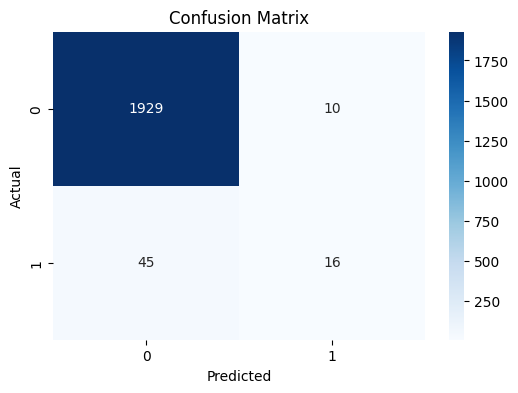

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print classification report and accuracy
print(classification_report(y_test, y_pred))
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regression: ', Logistic)

# Confusion Matrix and ROC Curve
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')



# After CTGAN

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1939
           1       0.53      0.34      0.42        61

    accuracy                           0.97      2000
   macro avg       0.75      0.67      0.70      2000
weighted avg       0.97      0.97      0.97      2000

Logistic Regression:  0.9705


Text(0.5, 14.722222222222216, 'Predicted')

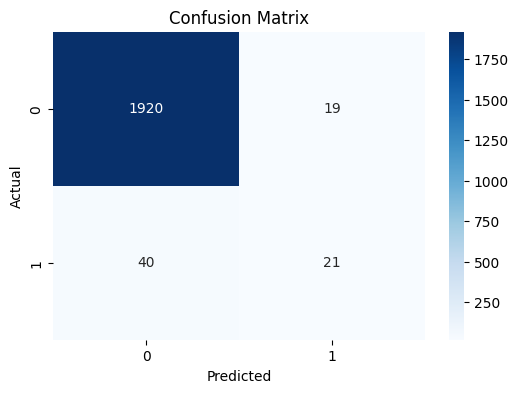

In [105]:
# Logistic Regression
clf = LogisticRegression()
clf.fit(X_GAN_train, y_GAN_train)
y_pred = clf.predict(X_test)

# Print classification report and accuracy
print(classification_report(y_test, y_pred))
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regression: ', Logistic)

# Confusion Matrix and ROC Curve
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')


## Using SMOTE

              precision    recall  f1-score   support

           0       0.99      0.83      0.91      1939
           1       0.13      0.84      0.23        61

    accuracy                           0.83      2000
   macro avg       0.56      0.83      0.57      2000
weighted avg       0.97      0.83      0.88      2000

Logistic Regression:  0.831


Text(0.5, 14.722222222222216, 'Predicted')

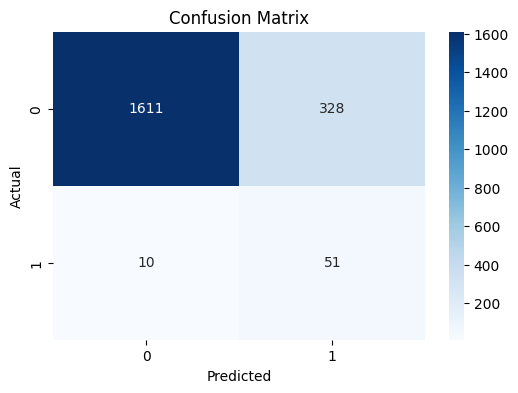

In [106]:
# Logistic Regression
clf = LogisticRegression()
clf.fit(x_SMOTE_train, y_SMOTE_train)
y_pred = clf.predict(X_test)

# Print classification report and accuracy
print(classification_report(y_test, y_pred))
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regression: ', Logistic)

# Confusion Matrix and ROC Curve
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
